In [1]:
INPUT_DIR = './example_data/titanic/'
!ls -lah {INPUT_DIR}

total 184
drwxr-xr-x  5 aandrei  admin   160B Jan  5 12:00 .
drwxr-xr-x  3 aandrei  admin    96B Jan  5 12:01 ..
-rw-r--r--@ 1 aandrei  admin   3.2K Jan  5 12:00 gender_submission.csv
-rw-r--r--@ 1 aandrei  admin    28K Jan  5 12:00 test.csv
-rw-r--r--@ 1 aandrei  admin    60K Jan  5 12:00 train.csv


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nmlu.qinspect.nb import df_peek, df_display_all
from nmlu.qinspect.common import df_types_and_stats
import nmlu.etl as etl
import nmlu.eda as eda
import nmlu.model_analysis as ma

# sns.set()

/Users/aandrei/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Peek

In [4]:
# load
df_raw = pd.read_csv(f'{INPUT_DIR}train.csv', low_memory=False)

In [5]:
# peek
df_peek(df_raw, 'df_raw')


--- DF (891, 12) df_raw:
	> TYPES & STATS:


,sparklines_str,type,missing #,missing %,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,▃▃██▆▄▃▂▁▁,float64,177,19.87,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
Cabin,NaN,object,687,77.10,204,147,G6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,NaN,object,2,0.22,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,█▂▁▁▁▁▁▁▁▁,float64,0,0.00,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
Name,NaN,object,0,0.00,891,891,"Jacobsohn, Mr. Sidney Samuel",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,█▂▁▂▁▁▁▁▁▁,int64,0,0.00,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
PassengerId,▁▁▁▁▁▁▁▁▁█,int64,0,0.00,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Pclass,▄▁▁▁▁▄▁▁▁█,int64,0,0.00,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Sex,NaN,object,0,0.00,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,█▃▁▁▁▁▁▁▁▁,int64,0,0.00,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8



	> DATA:


,0,1,...,889,890
PassengerId,1,2,...,890,891
Survived,0,1,...,1,0
Pclass,3,1,...,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...",...,"Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,...,male,male
Age,22,38,...,26,32
SibSp,1,1,...,0,0
Parch,0,0,...,0,0
Ticket,A/5 21171,PC 17599,...,111369,370376
Fare,7.25,71.2833,...,30,7.75


In [6]:
# take a look at some random sample(s)
df_display_all(etl.get_sample(df_raw, 10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S


# ETL

In [7]:
df = df_raw.copy()

### convert_cats

In [8]:
etl.train_cats(df)
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [9]:
# manually convert to cat everyhting else we know it's categorical
df.Survived = df.Survived.astype('category').cat.as_ordered()
df.Pclass = df.Pclass.astype('category').cat.as_ordered()
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [10]:
df.Pclass.cat.categories
# TO SET CUSTOM ORDER OF CATEGORIES:
# df.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

Int64Index([1, 2, 3], dtype='int64')

### proc_df
1. split response/dependent var
2. numericalize
3. fix missing (replace with median)
4. (optionally) one-hot-encoding

In [11]:
df_numericalized, _, nas = etl.proc_df(df, ignore_flds=['Survived'])
df_numericalized.Survived = df_numericalized.Survived.cat.codes
df_types_and_stats(df_numericalized)

,sparklines_str,type,missing #,missing %,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,▂▂▅█▃▂▂▁▁▁,float64,0,0.0,891,NaN,NaN,NaN,29.3616,13.0197,0.42,22,28,35,80
Age_na,NaN,bool,0,0.0,891,2,False,714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,█▁▁▁▁▁▁▁▁▁,int16,0,0.0,891,NaN,NaN,NaN,17.6296,38.1403,0,0,0,0,147
Embarked,▁▁▁▃▁▁▂▁▁█,int8,0,0.0,891,NaN,NaN,NaN,2.52974,0.800254,0,2,3,3,3
Fare,█▂▁▁▁▁▁▁▁▁,float64,0,0.0,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
Name,▁▁▁▁▁▁▁▁▁█,int16,0,0.0,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Parch,█▂▁▂▁▁▁▁▁▁,int64,0,0.0,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
PassengerId,▁▁▁▁▁▁▁▁▁█,int64,0,0.0,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Pclass,▄▁▁▁▁▄▁▁▁█,int8,0,0.0,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Sex,▅▁▁▁▁▁▁▁▁█,int8,0,0.0,891,NaN,NaN,NaN,1.64759,0.47799,1,1,2,2,2


# EDA

In [12]:
eda.set_plot_sane_defaults()
# sns.set()

/Users/aandrei/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


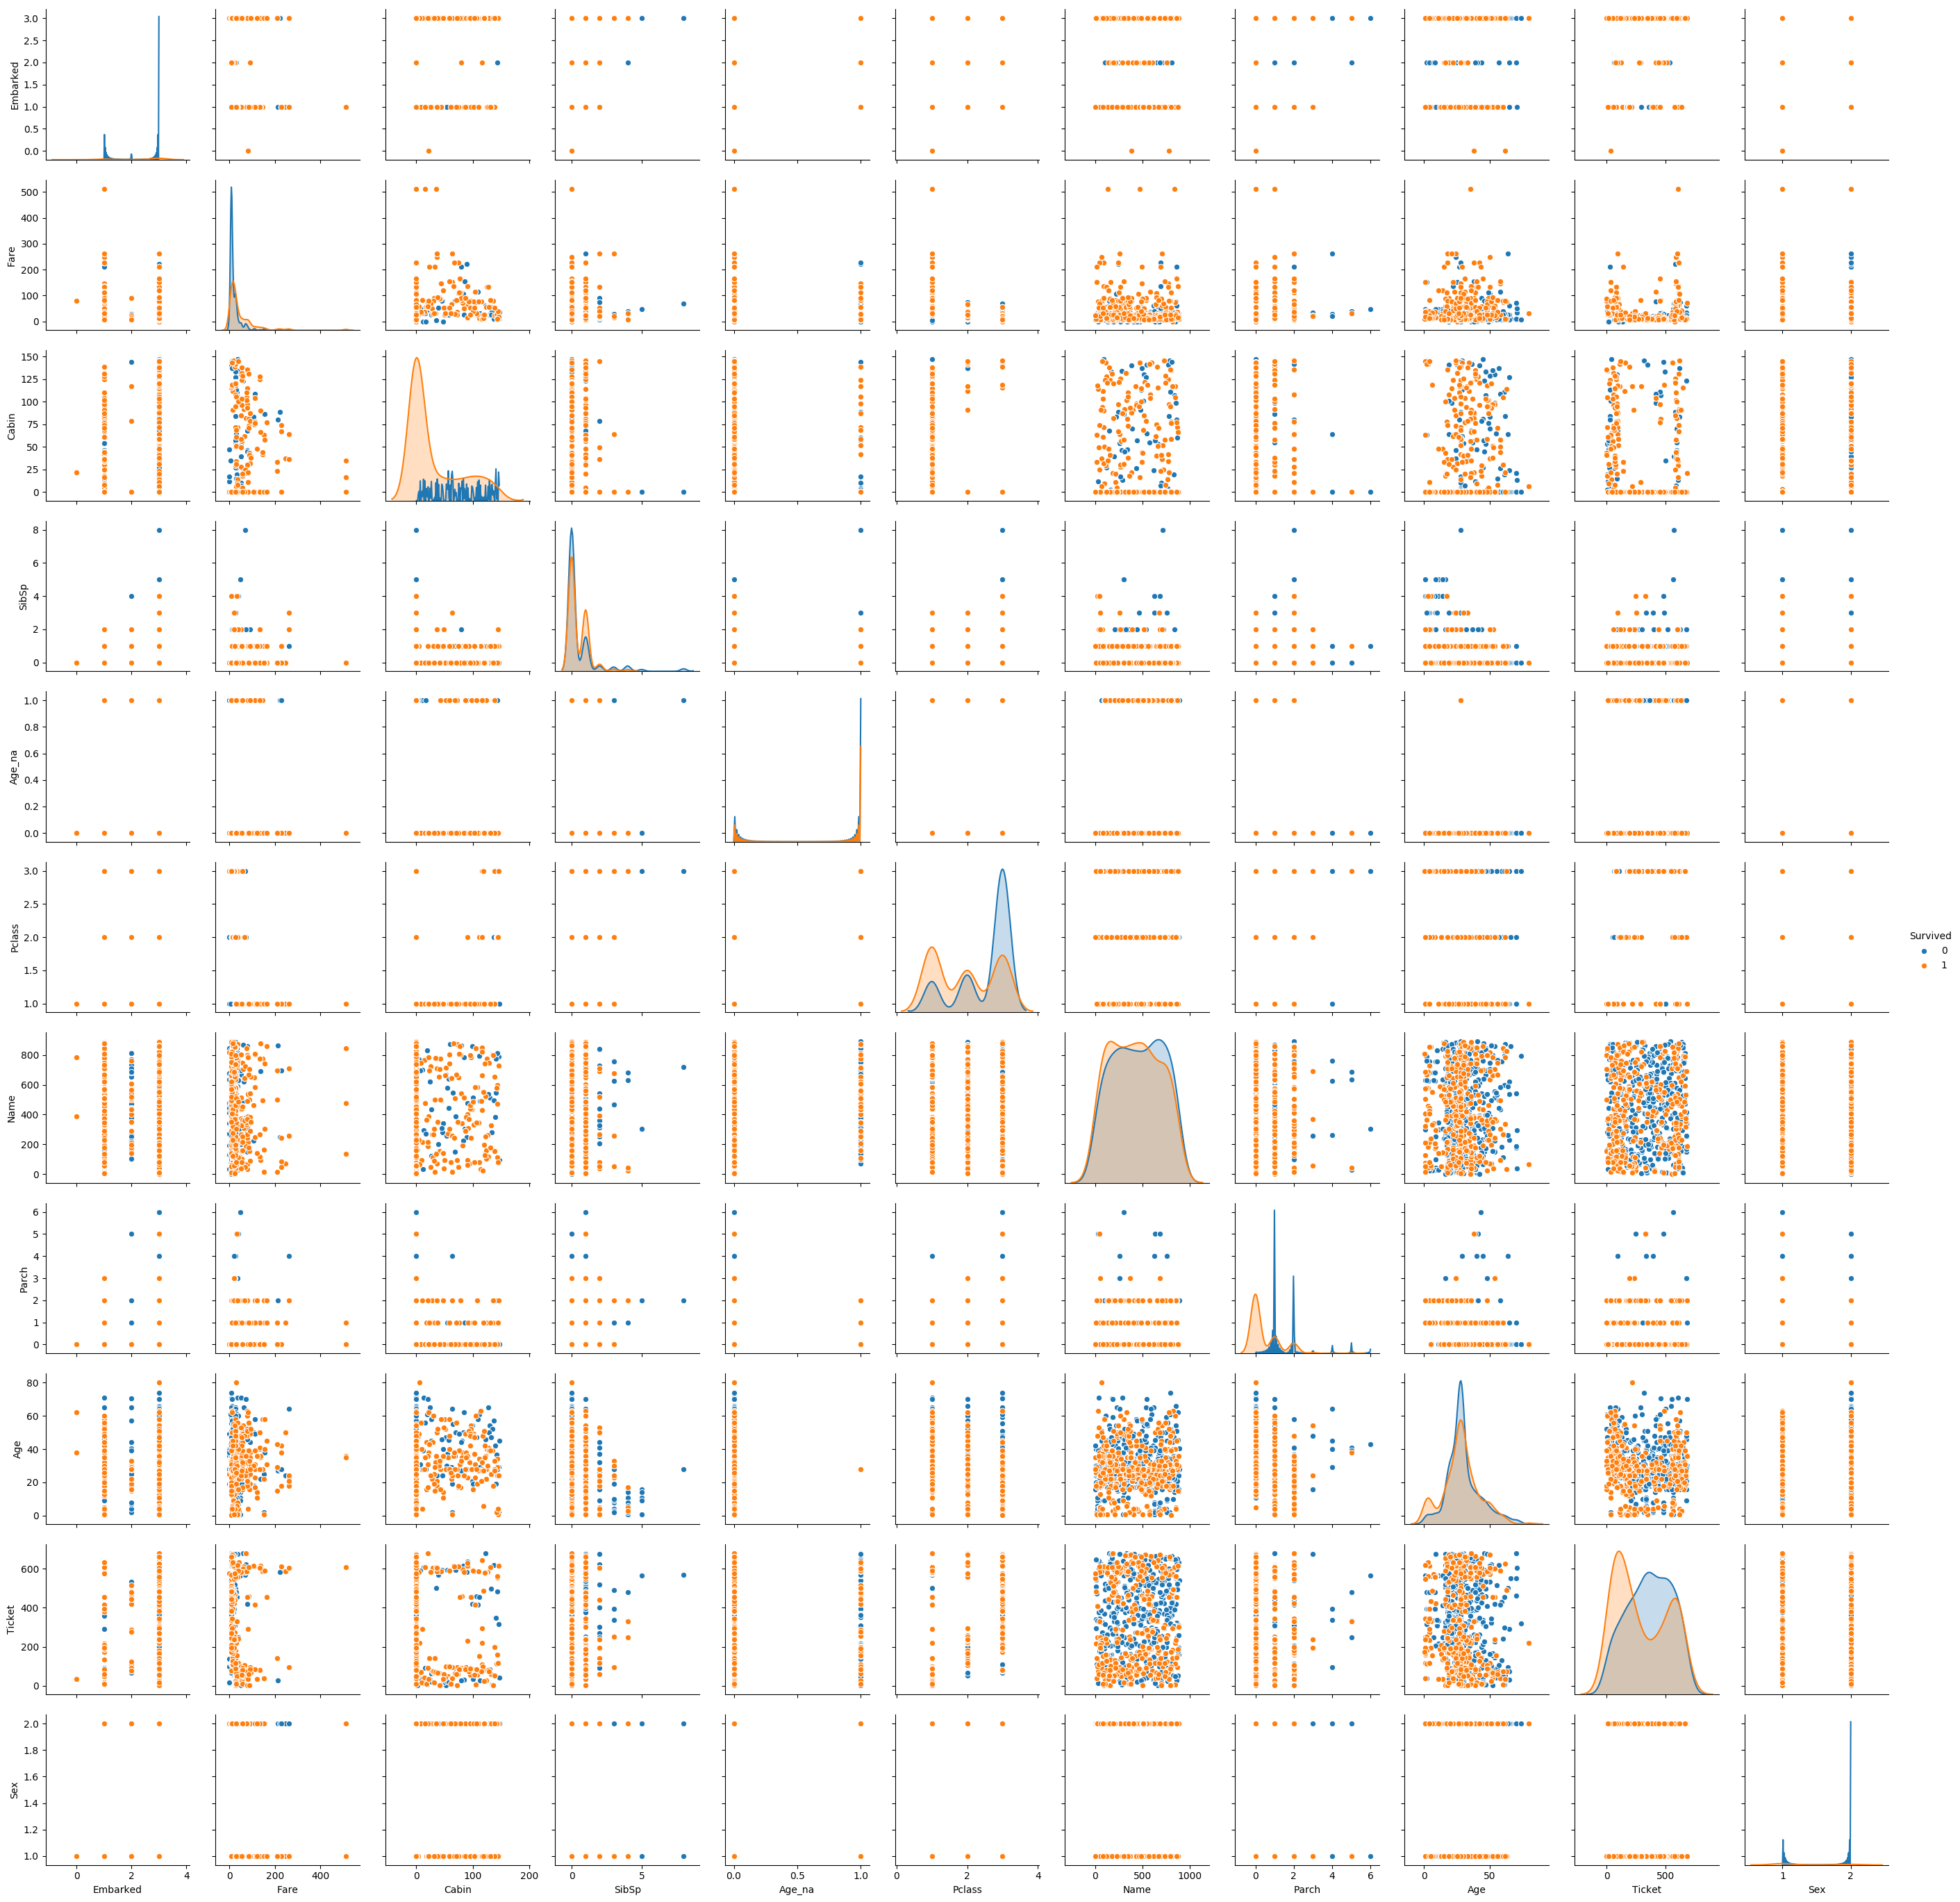

In [13]:
eda.plot_pairs_dists(df_numericalized, 'Survived', except_cols={'PassengerId'});

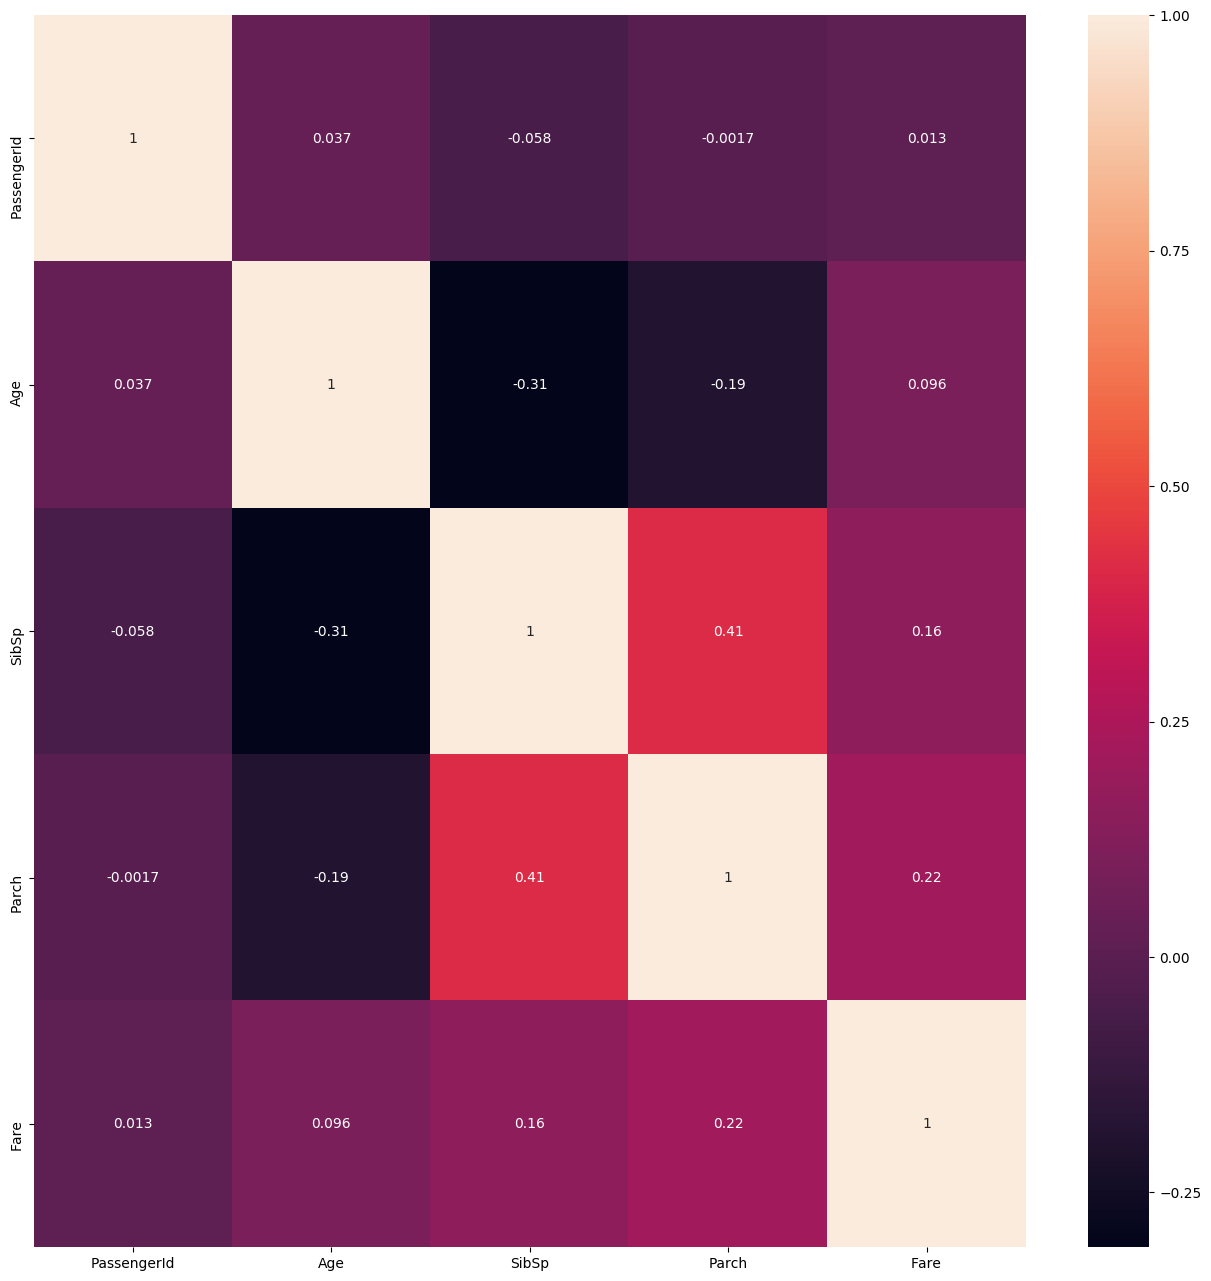

In [14]:
eda.plot_heatmap(df);

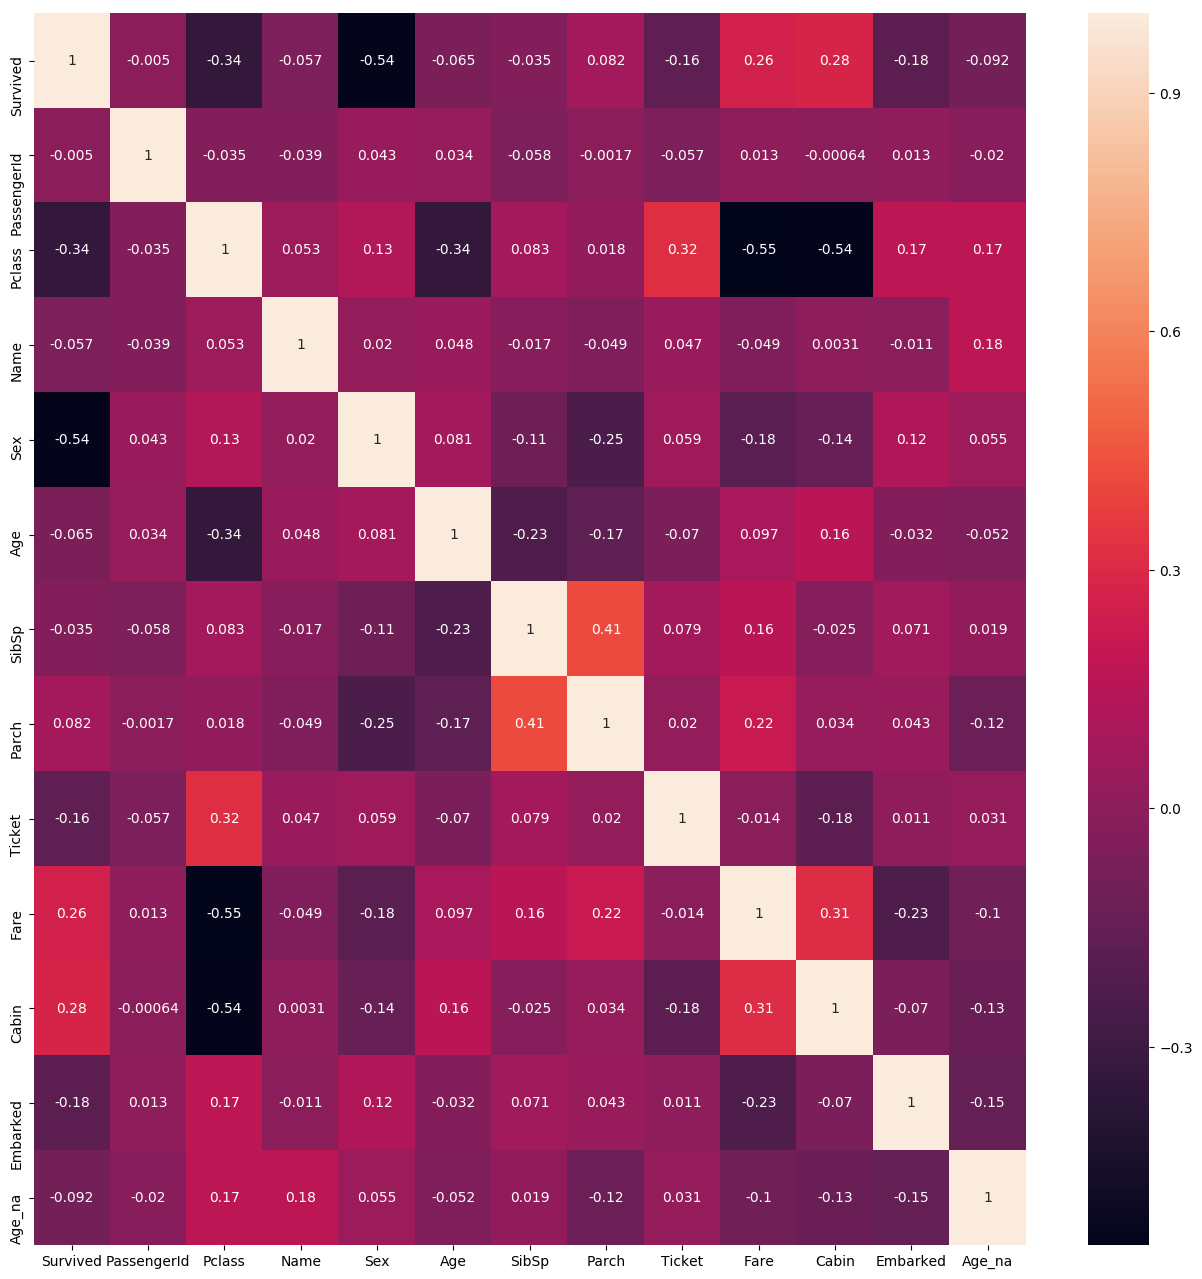

In [15]:
eda.plot_heatmap(df_numericalized);

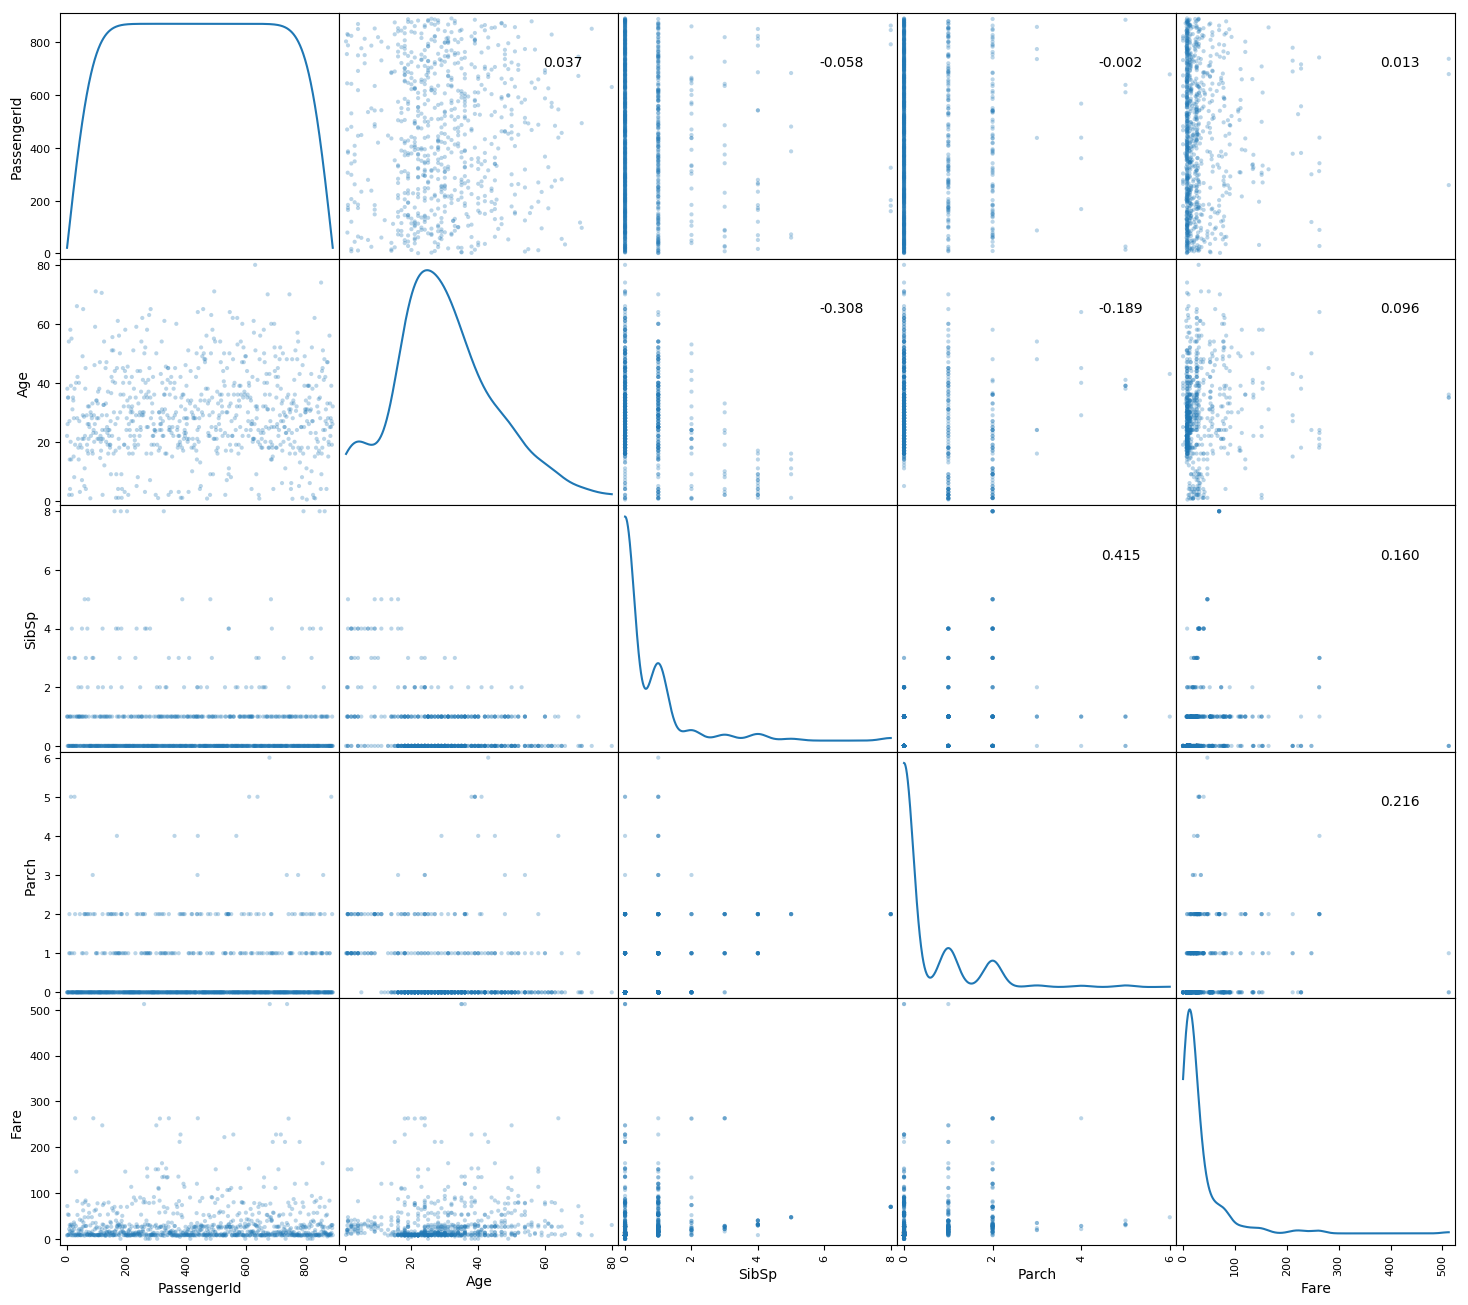

In [16]:
eda.plot_pairs_corr(df);

Survived    0    1  All
Sex                    
female     81  233  577
male      468  109  314
All       549  342  891


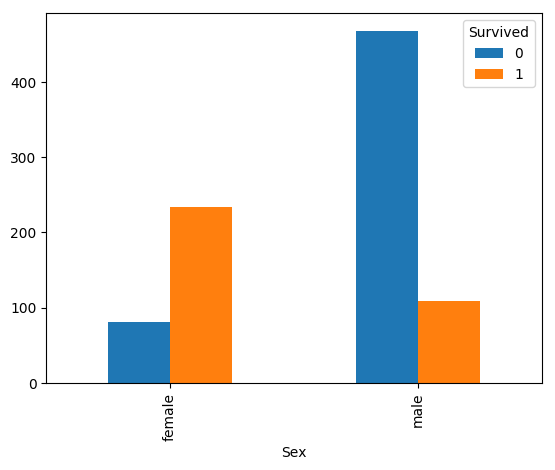

In [17]:
eda.show_cat_feature_vs_y(df, 'Sex', 'Survived', 'PassengerId')

Survived    0    1  All
Parch                  
0         445  233  678
1          53   65  118
2          40   40   80
3           2    3    5
4           4    0    4
5           4    1    5
6           1    0    1
All       549  342  891


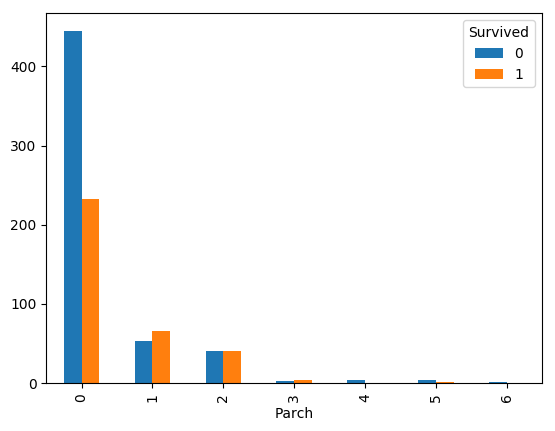

In [18]:
eda.show_cat_feature_vs_y(df, 'Parch', 'Survived', 'PassengerId')

Survived    0    1  All
SibSp                  
0         398  210  608
1          97  112  209
2          15   13   28
3          12    4   16
4          15    3   18
5           5    0    5
8           7    0    7
All       549  342  891


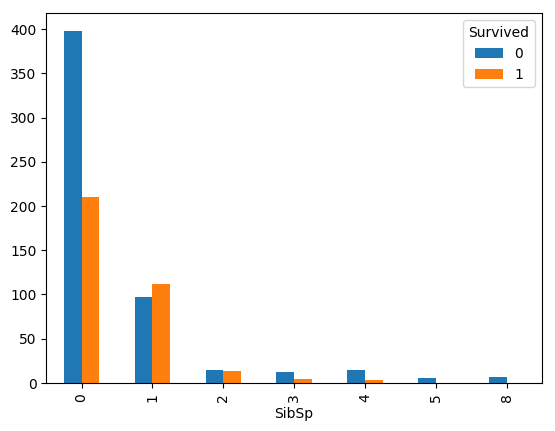

In [19]:
eda.show_cat_feature_vs_y(df, 'SibSp', 'Survived', 'PassengerId')

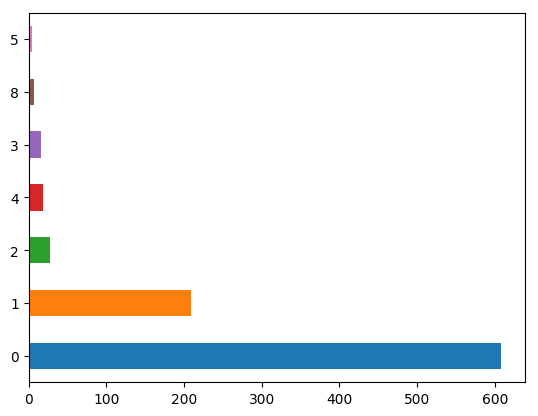

In [20]:
df.SibSp.value_counts().plot.barh()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [60.0, 60.0, 100.0, 100.0],
  [20.0, 20.0, 80.0, 80.0]],
 'dcoord': [[0.0, 0.48109999999999997, 0.48109999999999997, 0.0],
  [0.0, 0.55, 0.55, 0.0],
  [0.48109999999999997, 0.750175, 0.750175, 0.55],
  [0.0, 0.6768000000000001, 0.6768000000000001, 0.0],
  [0.0, 0.8246, 0.8246, 0.0],
  [0.6768000000000001, 0.920075, 0.920075, 0.8246],
  [0.0, 0.8766, 0.8766, 0.0],
  [0.0, 0.9654, 0.9654, 0.0],
  [0.8766, 0.97195, 0.97195, 0.9654],
  [0.920075, 1.0214750000000001, 1.0214750000000001, 0.97195],
  [0.750175, 1.11439375, 1.11439375, 1.0214750000000001]],
 'ivl': ['Fare',
  'Cabin',
  'SibSp',
  'Parch',
  'Pclass',
  'Ticket',
  'Name',
  'Age_na',
  'Sex',
  'Embarked',
  'PassengerId',
  'Age'],
 'leaves': [8, 9, 5, 6, 1, 7, 

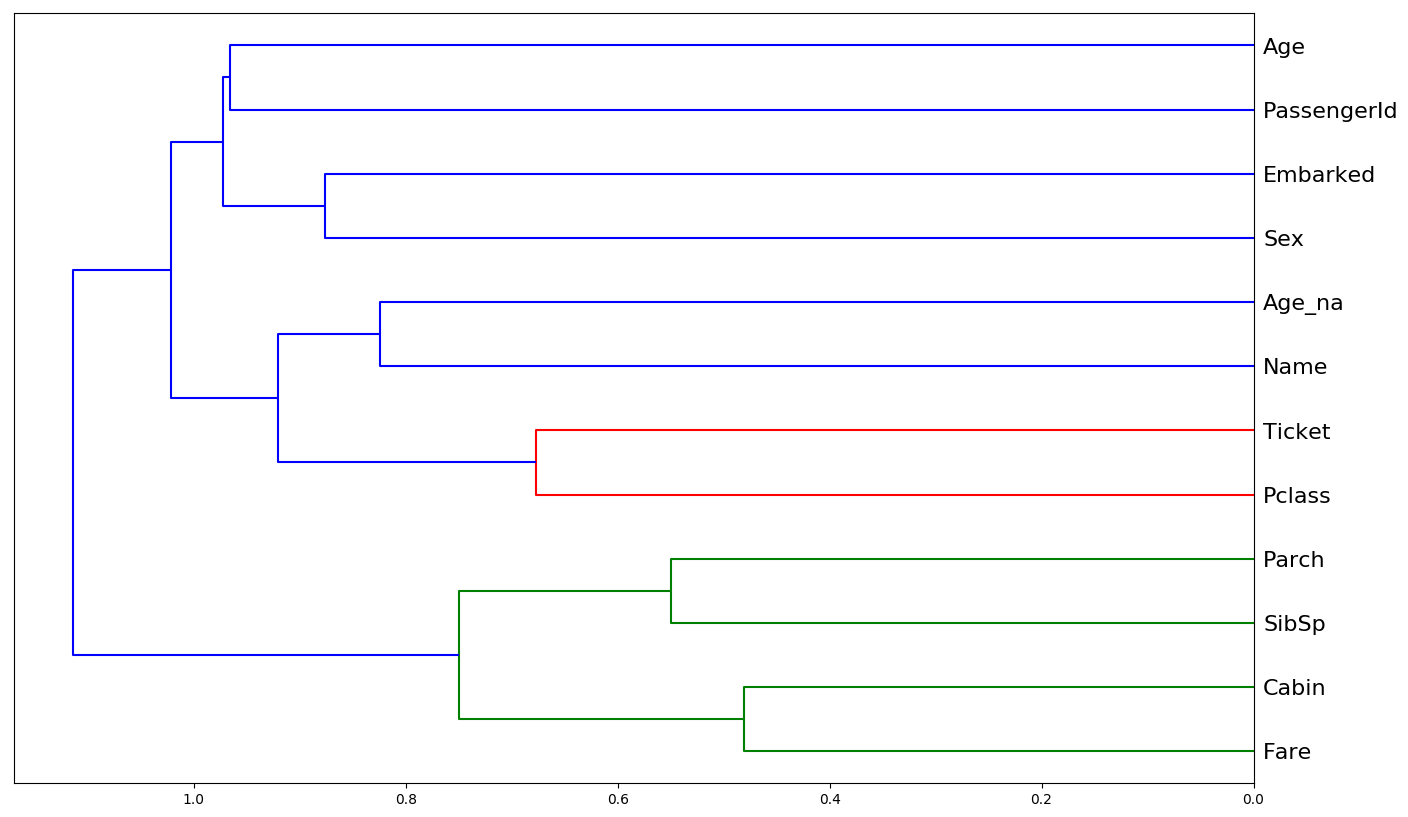

In [21]:
eda.plot_dendrogram(df_numericalized.drop('Survived', axis=1))

# MA

In [22]:
trn_f = 0.8
trn_sz = int(df.shape[0] * trn_f)
df_trn, df_val = etl.arr_split(df_numericalized, trn_sz)
df_cats_trn, df_cats_val = etl.arr_split(df, trn_sz)
print("data size (training and validation):", df_trn.shape, df_val.shape)

y_trn = df_trn['Survived']
x_trn = df_trn.drop('Survived', axis=1)
print("train sizes:", x_trn.shape, y_trn.shape)

y_val = df_val['Survived']
x_val = df_val.drop('Survived', axis=1)
print("validation sizes:", x_val.shape, x_val.shape)

data size (training and validation): (712, 13) (179, 13)
train sizes: (712, 12) (712,)
validation sizes: (179, 12) (179, 12)


In [23]:
def rmse(x, y):
    return np.sqrt(((x - y)**2).mean())


def print_score(model):
    rmse_trn = rmse(model.predict(x_trn), y_trn)
    rmse_val = rmse(model.predict(x_val), y_val)
    score_trn = model.score(x_trn, y_trn)
    score_val = model.score(x_val, y_val)
    print(f"RMSE training: {rmse_trn:.6f}, validation: {rmse_val:.6f}")
    print(f"Score training: {score_trn:.6f}, validation: {score_val:.6f}")
    if hasattr(model, 'oob_score_'):
        print(f"OOB score: {model.oob_score_:.6f}")

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier(n_estimators=20, min_samples_leaf=3, max_features=0.75, n_jobs=-1, oob_score=True)
model.fit(x_trn, y_trn)

/Users/aandrei/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/aandrei/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.75, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [26]:
print_score(model)

RMSE training: 0.259645, validation: 0.366167
Score training: 0.932584, validation: 0.865922
OOB score: 0.808989


In [27]:
display(ma.get_ensemble_preds_with_confidence(
    model, x_val, df_cats_val, 'Sex', 'Survived'))

,Sex,pred,pred_std
0,female,0.715517,0.222656
1,male,0.223967,0.334142


In [28]:
display(ma.get_ensemble_preds_with_confidence(
    model, x_val, df_cats_val, 'SibSp', 'Survived'))

,SibSp,pred,pred_std
0,0,0.323828,0.306862
1,1,0.606250,0.278171
2,2,0.500000,0.217945
3,3,0.450000,0.150000
4,4,0.137500,0.283253
5,8,0.150000,0.357071


In [29]:
fi = ma.rf_feat_importance(model, x_val); fi[:10]

,cols,imp
3,Sex,0.364807
2,Name,0.102356
7,Ticket,0.097190
1,Pclass,0.086419
0,PassengerId,0.081396
8,Fare,0.076054
4,Age,0.074453
9,Cabin,0.058064
5,SibSp,0.026532
10,Embarked,0.018074


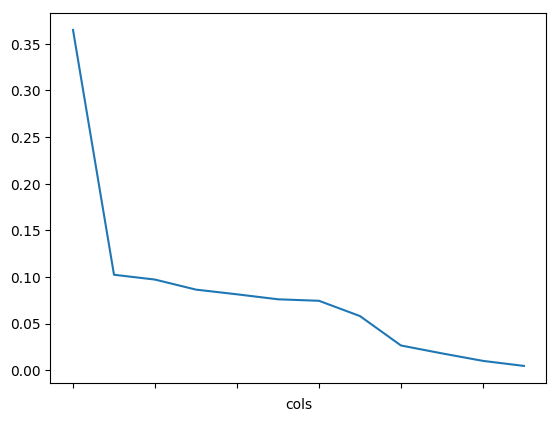

In [30]:
fi.plot('cols', 'imp', legend=False)

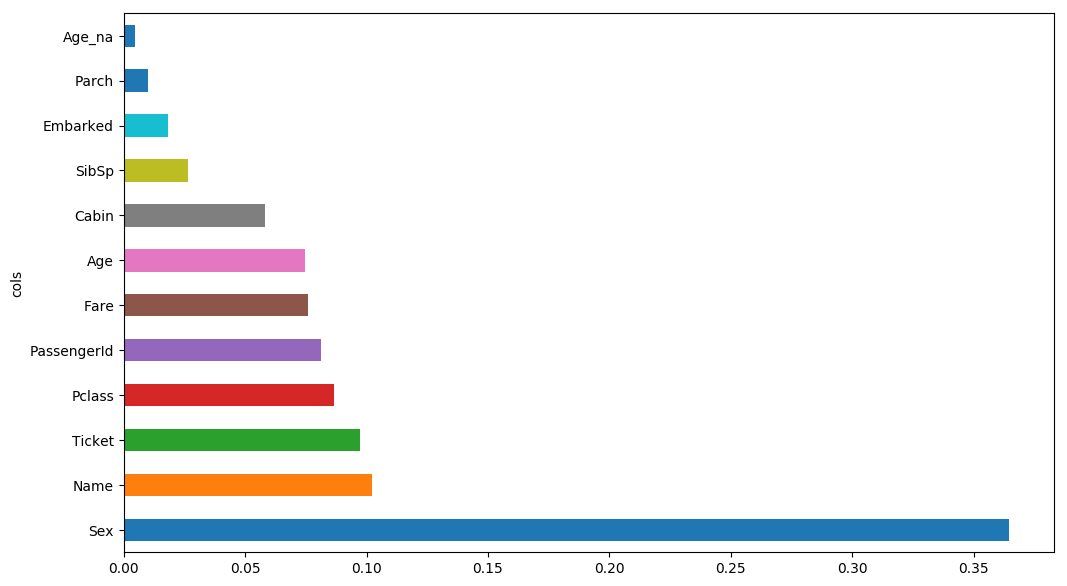

In [31]:
fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False);

           cols       imp
3           Sex  0.364807
2          Name  0.102356
7        Ticket  0.097190
1        Pclass  0.086419
0   PassengerId  0.081396
8          Fare  0.076054
4           Age  0.074453
9         Cabin  0.058064
5         SibSp  0.026532
10     Embarked  0.018074
6         Parch  0.010028
11       Age_na  0.004628


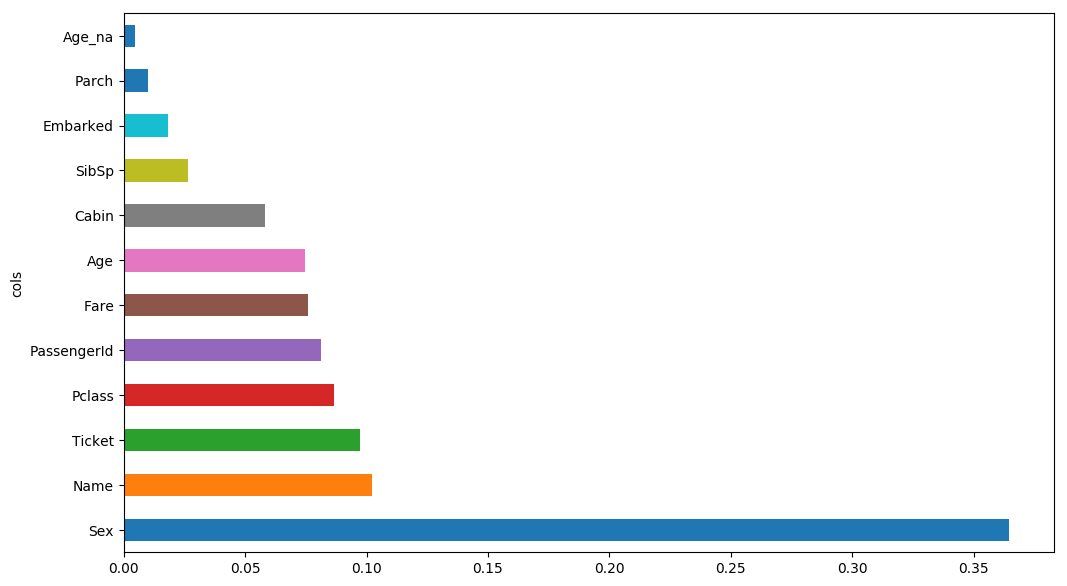

In [32]:
ma.rf_show_plot_fi(model, x_val)

In [33]:
ma.rf_predict_with_explanations(model, x_val[:3], df_cats_val, 'Survived')

[({0: 0.8296428571428571, 1: 0.17035714285714282},
  [('Fare', 52.0, array([-0.07971165,  0.07971165])),
   ('Parch', 0, array([-0.05882686,  0.05882686])),
   ('Ticket', '19996', array([-0.04886386,  0.04886386])),
   ('Survived', 1, array([-0.03383483,  0.03383483])),
   ('PassengerId', 713, array([-0.0332062,  0.0332062])),
   ('Embarked', 'S', array([-0.00188728,  0.00188728])),
   ('SibSp', 1, array([0., 0.])),
   ('Age', 48.0, array([ 0.009375, -0.009375])),
   ('Cabin', 'C126', array([ 0.03748345, -0.03748345])),
   ('Pclass', 1, array([ 0.0869276, -0.0869276])),
   ('Sex', 'male', array([ 0.13186882, -0.13186882])),
   ('Name', 'Taylor, Mr. Elmer Zebley', array([ 0.20908271, -0.20908271]))]),
 ({0: 0.8876136363636362, 1: 0.11238636363636363},
  [('PassengerId', 713, array([-0.02648326,  0.02648326])),
   ('Ticket', '19996', array([-0.00391905,  0.00391905])),
   ('Sex', 'male', array([-0.00345971,  0.00345971])),
   ('Pclass', 1, array([-0.00272254,  0.00272254])),
   ('SibSp',